In [10]:
!pip install arch

     |████████████████████████████████| 798kB 3.2MB/s 


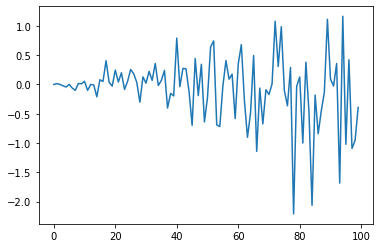

In [11]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import arch
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()
# We can see the change in variance as time increments# check correlations of squared observations

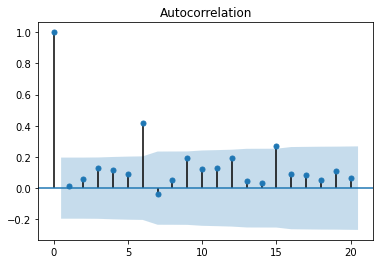

In [12]:
# check correlations of squared observations
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = pd.DataFrame([x**2 for x in data])
# create acf plot
plot_acf(squared_data)
pyplot.show()

In [13]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

# ARCH Model

In [15]:
# define model
model = arch.arch_model(train, mean='Zero', vol='ARCH', p=15)

In [16]:
# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 41.42285909902891
Iteration:      2,   Func. Count:     37,   Neg. LLF: 38.58236083168643
Iteration:      3,   Func. Count:     56,   Neg. LLF: 36.70857630115163
Iteration:      4,   Func. Count:     75,   Neg. LLF: 35.64329949592393
Iteration:      5,   Func. Count:     94,   Neg. LLF: 34.388550595379975
Iteration:      6,   Func. Count:    113,   Neg. LLF: 31.603119552517732
Iteration:      7,   Func. Count:    132,   Neg. LLF: 30.180005155417653
Iteration:      8,   Func. Count:    150,   Neg. LLF: 28.719725365835618
Iteration:      9,   Func. Count:    169,   Neg. LLF: 25.76384751972326
Iteration:     10,   Func. Count:    189,   Neg. LLF: 25.732447890170047
Iteration:     11,   Func. Count:    208,   Neg. LLF: 25.649898218420457
Iteration:     12,   Func. Count:    227,   Neg. LLF: 25.560400051601007
Iteration:     13,   Func. Count:    247,   Neg. LLF: 25.546556809654177
Iteration:     14,   Func. Count:    266,   Neg. LLF: 25

In [17]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 41.42285909902891
Iteration:      2,   Func. Count:     37,   Neg. LLF: 38.58236083168643
Iteration:      3,   Func. Count:     56,   Neg. LLF: 36.70857630115163
Iteration:      4,   Func. Count:     75,   Neg. LLF: 35.64329949592393
Iteration:      5,   Func. Count:     94,   Neg. LLF: 34.388550595379975
Iteration:      6,   Func. Count:    113,   Neg. LLF: 31.603119552517732
Iteration:      7,   Func. Count:    132,   Neg. LLF: 30.180005155417653
Iteration:      8,   Func. Count:    150,   Neg. LLF: 28.719725365835618
Iteration:      9,   Func. Count:    169,   Neg. LLF: 25.76384751972326
Iteration:     10,   Func. Count:    189,   Neg. LLF: 25.732447890170047
Iteration:     11,   Func. Count:    208,   Neg. LLF: 25.649898218420457
Iteration:     12,   Func. Count:    227,   Neg. LLF: 25.560400051601007
Iteration:     13,   Func. Count:    247,   Neg. LLF: 25.546556809654177
Iteration:     14,   Func. Count:    266,   Neg. LLF: 25

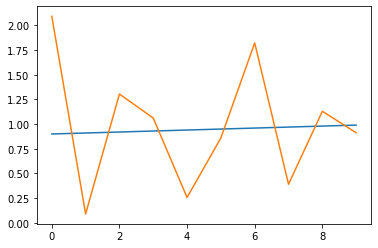

In [18]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# GARCH Model

In [19]:
# define model
model = arch.arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 50.22157561649052
Iteration:      2,   Func. Count:     71,   Neg. LLF: 49.70879553327738
Iteration:      3,   Func. Count:    105,   Neg. LLF: 46.966011892911055
Iteration:      4,   Func. Count:    139,   Neg. LLF: 43.150024651896906
Iteration:      5,   Func. Count:    173,   Neg. LLF: 40.82899265297827
Iteration:      6,   Func. Count:    207,   Neg. LLF: 38.99236443216431
Iteration:      7,   Func. Count:    241,   Neg. LLF: 35.11219454743571
Iteration:      8,   Func. Count:    275,   Neg. LLF: 30.857247546654968
Iteration:      9,   Func. Count:    309,   Neg. LLF: 29.78736351965208
Iteration:     10,   Func. Count:    343,   Neg. LLF: 28.255374146392832
Iteration:     11,   Func. Count:    376,   Neg. LLF: 26.957530453752202
Iteration:     12,   Func. Count:    411,   Neg. LLF: 26.71518962626341
Iteration:     13,   Func. Count:    445,   Neg. LLF: 26.284849022167098
Iteration:     14,   Func. Count:    479,   Neg. LLF: 25.9

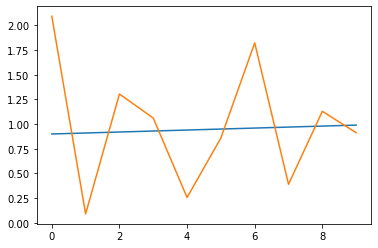

In [20]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()